# EDA

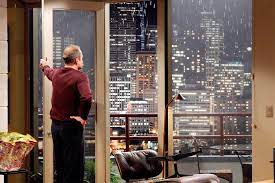

In [185]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Data exploration and cleaning

In [186]:
# importing raw data
housing_df = pd.read_csv('data/King_County_House_prices_dataset.csv')

In [187]:
housing_df.shape # 21 columns, 21597 lines

(21597, 21)

In [188]:
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [189]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [190]:
#create a copy of the dataset
housing_df2 = housing_df.copy()

In [191]:
# rename certain columns so that they have more meaning
housing_df2.rename(columns = {'date' : 'selling_date','price' : 'predicted_price', 'sqft_living15': 'neighbourhood_living_space', 'sqft_lot15' : 'neighbourhood_lot_space'}, inplace = True)

# there are no duplicates!
housing_df2.duplicated().value_counts()

# check for missing values


False    21597
Name: count, dtype: int64

In [192]:
# drop uninteresting columns
housing_df2.drop(['waterfront', 'view','sqft_above','sqft_basement'], axis = 1, inplace = True)

In [193]:
# look for Nans
housing_df2
housing_df2.isna().sum()




id                               0
selling_date                     0
predicted_price                  0
bedrooms                         0
bathrooms                        0
sqft_living                      0
sqft_lot                         0
floors                           0
condition                        0
grade                            0
yr_built                         0
yr_renovated                  3842
zipcode                          0
lat                              0
long                             0
neighbourhood_living_space       0
neighbourhood_lot_space          0
dtype: int64

In [194]:
#housing_df2.describe(exclude = 'datetime64')

In [195]:
# check data types
housing_df2.dtypes

id                              int64
selling_date                   object
predicted_price               float64
bedrooms                        int64
bathrooms                     float64
sqft_living                     int64
sqft_lot                        int64
floors                        float64
condition                       int64
grade                           int64
yr_built                        int64
yr_renovated                  float64
zipcode                         int64
lat                           float64
long                          float64
neighbourhood_living_space      int64
neighbourhood_lot_space         int64
dtype: object

In [196]:
# adapt data types
housing_df2['floors'] = housing_df2.floors.astype('int64')
housing_df2['predicted_price'] = housing_df2.predicted_price.astype('int64')
housing_df2['bathrooms'] = housing_df2.bathrooms.astype('int64')
housing_df2['id'] = housing_df2.predicted_price.astype('str')
#housing_df2['zipcode'] = housing_df2.predicted_price.astype('str')
housing_df2['selling_date'] = pd.to_datetime(housing_df2['selling_date'], dayfirst = True)
housing_df2['predicted_price'] = housing_df2.predicted_price.round()
housing_df2.head()

,id,selling_date,predicted_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,lat,long,neighbourhood_living_space,neighbourhood_lot_space
0,221900,2014-10-13,221900,3,1,1180,5650,1,3,7,1955,0.000,98178,47.511,-122.257,1340,5650
1,538000,2014-12-09,538000,3,2,2570,7242,2,3,7,1951,1991.000,98125,47.721,-122.319,1690,7639
2,180000,2015-02-25,180000,2,1,770,10000,1,3,6,1933,NaN,98028,47.738,-122.233,2720,8062
3,604000,2014-12-09,604000,4,3,1960,5000,1,5,7,1965,0.000,98136,47.521,-122.393,1360,5000
4,510000,2015-02-18,510000,3,2,1680,8080,1,3,8,1987,0.000,98074,47.617,-122.045,1800,7503


In [197]:
housing_df2.dtypes

id                                    object
selling_date                  datetime64[ns]
predicted_price                        int64
bedrooms                               int64
bathrooms                              int64
sqft_living                            int64
sqft_lot                               int64
floors                                 int64
condition                              int64
grade                                  int64
yr_built                               int64
yr_renovated                         float64
zipcode                                int64
lat                                  float64
long                                 float64
neighbourhood_living_space             int64
neighbourhood_lot_space                int64
dtype: object

In [198]:
housing_statistics = housing_df2.describe(percentiles = [.01, .05, .10, .25, .5, .75, .90, .95, .99])
#housing_statistics['predicted_price', 'grade', 'condition', 'yr_built', 'neighbourhood_living_space', 'neighbourhood_lot_space']
housing_statistics

,selling_date,predicted_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,lat,long,neighbourhood_living_space,neighbourhood_lot_space
count,21597,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,2014-10-29 04:20:38.171968512,540296.574,3.373,1.751,2080.322,15099.409,1.446,3.410,7.658,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
min,2014-05-02 00:00:00,78000.000,1.000,0.000,370.000,520.000,1.000,1.000,3.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
1%,2014-05-06 00:00:00,154000.000,2.000,1.000,720.000,1013.960,1.000,3.000,5.000,1904.000,0.000,98001.000,47.257,-122.408,950.000,1190.960
5%,2014-05-20 00:00:00,210000.000,2.000,1.000,940.000,1800.800,1.000,3.000,6.000,1915.000,0.000,98004.000,47.310,-122.387,1140.000,2002.400
10%,2014-06-06 00:00:00,245000.000,2.000,1.000,1090.000,3322.600,1.000,3.000,6.000,1926.000,0.000,98008.000,47.350,-122.372,1258.400,3667.800
25%,2014-07-22 00:00:00,322000.000,3.000,1.000,1430.000,5040.000,1.000,3.000,7.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,2014-10-16 00:00:00,450000.000,3.000,2.000,1910.000,7618.000,1.000,3.000,7.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,2015-02-17 00:00:00,645000.000,4.000,2.000,2550.000,10685.000,2.000,4.000,8.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
90%,2015-04-10 00:00:00,887000.000,4.000,3.000,3254.000,21371.600,2.000,4.000,9.000,2007.000,0.000,98155.000,47.728,-122.022,2930.000,17822.000


In [199]:
# cut of the highest 1% of houses
price_higher_99 = housing_df2.query('predicted_price > 1160000')
#price_higher_99
housing_df2.drop(price_higher_99.index).reset_index() # 214 most expensive objects dropped

,index,id,selling_date,predicted_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,lat,long,neighbourhood_living_space,neighbourhood_lot_space
0,0,221900,2014-10-13,221900,3,1,1180,5650,1,3,7,1955,0.000,98178,47.511,-122.257,1340,5650
1,1,538000,2014-12-09,538000,3,2,2570,7242,2,3,7,1951,1991.000,98125,47.721,-122.319,1690,7639
2,2,180000,2015-02-25,180000,2,1,770,10000,1,3,6,1933,NaN,98028,47.738,-122.233,2720,8062
3,3,604000,2014-12-09,604000,4,3,1960,5000,1,5,7,1965,0.000,98136,47.521,-122.393,1360,5000
4,4,510000,2015-02-18,510000,3,2,1680,8080,1,3,8,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,21592,360000,2014-05-21,360000,3,2,1530,1131,3,3,8,2009,0.000,98103,47.699,-122.346,1530,1509
20527,21593,400000,2015-02-23,400000,4,2,2310,5813,2,3,8,2014,0.000,98146,47.511,-122.362,1830,7200
20528,21594,402101,2014-06-23,402101,2,0,1020,1350,2,3,7,2009,0.000,98144,47.594,-122.299,1020,2007
20529,21595,400000,2015-01-16,400000,3,2,1600,2388,2,3,8,2004,0.000,98027,47.535,-122.069,1410,1287


## General facts on the Housing Data

## Overview of cheap houses (<25 percentile, <10th percentile, <5 percentile)

As my client is a social responsible person I assume she wants to buy houses which are cheap but not in a too bad shape. I want to show her what these kind of objects are like. Therefore I look for houses with a lower price then the 25th percentile but a better condition then the 25th percentile.

# Hypothesis

1. in poorer regions there are less houses to buy
2. cheap houses have a worse grade then more expensive houses
3. cheap houses are older then expensive houses

In [200]:
# create 9 bins for price percentiles
#price_percentile_bins = housing_statistics.iloc[3:11 , 1]
#price_labels = ['1%','5%', '10%','25%','50%','75%','90%','95%','99%']


# cut prices into bins
price_labels = ['very cheap', 'cheap', 'medium', 'expensive', 'very expensive']
price_cut = pd.cut(housing_df2['predicted_price'],5, labels = price_labels)
housing_df2['price_category'] = price_cut

# cut built-years
yr_built_labels = ['very old', 'old', 'medium', 'modern', 'very new']
year_built_cut = pd.cut(housing_df2['yr_built'],5, labels = yr_built_labels)
housing_df2['yr_category'] = year_built_cut


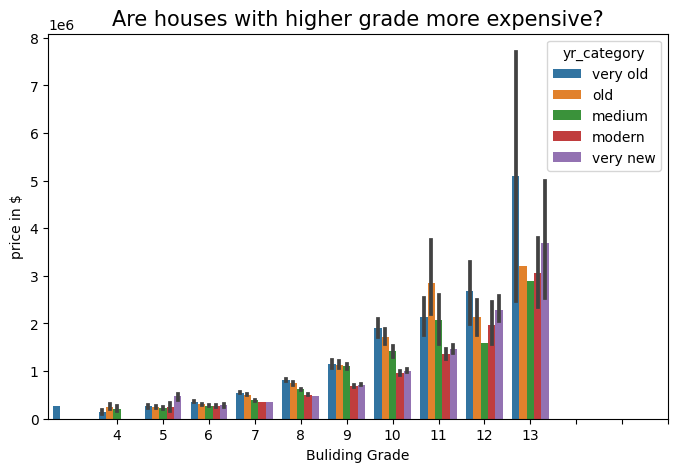

In [201]:
fig, ax = plt.subplots()
f1 = sns.barplot(data = housing_df2, x ='grade', y = 'predicted_price', hue = 'yr_category')
f1.set_ylabel("price in $", fontsize = 10)
f1.set_xlabel("Buliding Grade", fontsize = 10)
f1.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
#f1.set_xticklabels(labels=['1','2','3','4','5','6','7','8','9','10','11','12','13'])
f1.set_title("Are houses with higher grade more expensive?", fontsize = 15);

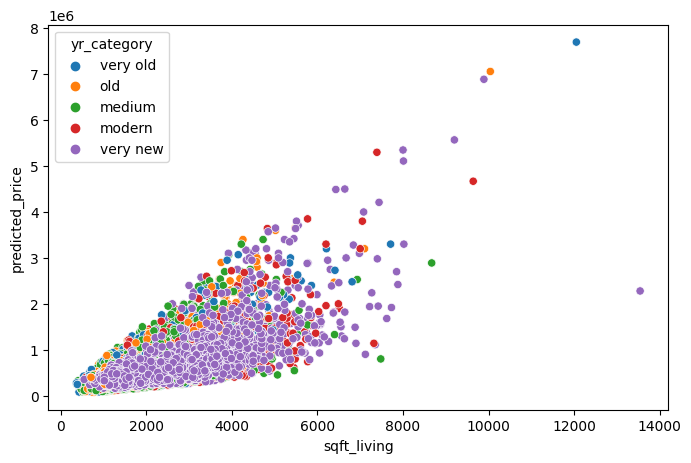

In [210]:
fig, ax = plt.subplots()
f1 = sns.scatterplot(data = housing_df2, x ='sqft_living', y = 'predicted_price', hue = 'yr_category')
#f1.set_ylabel("price in $", fontsize = 10)
#f1.set_xlabel("Buliding Grade", fontsize = 10)
#f1.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
#f1.set_xticklabels(labels=['1','2','3','4','5','6','7','8','9','10','11','12','13'])
#f1.set_title("Are houses with higher grade more expensive?", fontsize = 15);

In [203]:
# cheap houses that are still in good shape for poorer people
cheap_houses_25 = housing_df2.query('predicted_price < 322000 and grade > 4 and condition > 3').reset_index()
cheap_houses_10 = housing_df2.query('predicted_price < 245000 and grade > 4 and condition > 3').reset_index()
cheap_houses_05 = housing_df2.query('predicted_price < 210000 and grade > 4 and condition > 3').reset_index()
cheap_houses_01 = housing_df2.query('predicted_price < 154000 and grade > 4 and condition > 3').reset_index()
cheap_houses_25



,index,id,selling_date,predicted_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,lat,long,neighbourhood_living_space,neighbourhood_lot_space,price_category,yr_category
0,12,310000,2014-05-28,310000,3,1,1430,19901,1,4,7,1927,NaN,98028,47.756,-122.229,1780,12697,very cheap,old
1,18,189000,2014-12-05,189000,2,1,1200,9850,1,4,7,1921,0.000,98002,47.309,-122.210,1060,5095,very cheap,very old
2,19,230000,2015-04-24,230000,3,1,1250,9774,1,4,7,1969,0.000,98003,47.334,-122.306,1280,8850,very cheap,medium
3,25,233000,2014-11-03,233000,3,2,1710,4697,1,5,6,1941,0.000,98002,47.305,-122.218,1030,4705,very cheap,old
4,44,309000,2014-07-29,309000,3,1,1280,9656,1,4,6,1959,0.000,98058,47.449,-122.175,1340,8808,very cheap,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,20001,290000,2014-09-23,290000,1,0,740,1284,1,4,6,1928,0.000,98107,47.674,-122.406,1430,3988,very cheap,old
1981,20238,278000,2015-01-16,278000,2,2,1610,1968,2,4,7,1979,0.000,98056,47.518,-122.196,1950,1968,very cheap,modern
1982,20662,293000,2015-03-12,293000,2,2,1610,1968,2,4,7,1979,0.000,98056,47.518,-122.196,1950,1968,very cheap,modern
1983,21063,294570,2015-03-12,294570,3,1,1140,8400,1,4,7,1960,0.000,98059,47.502,-122.144,1400,9000,very cheap,medium


TypeError: Axes.scatter() missing 2 required positional arguments: 'x' and 'y'

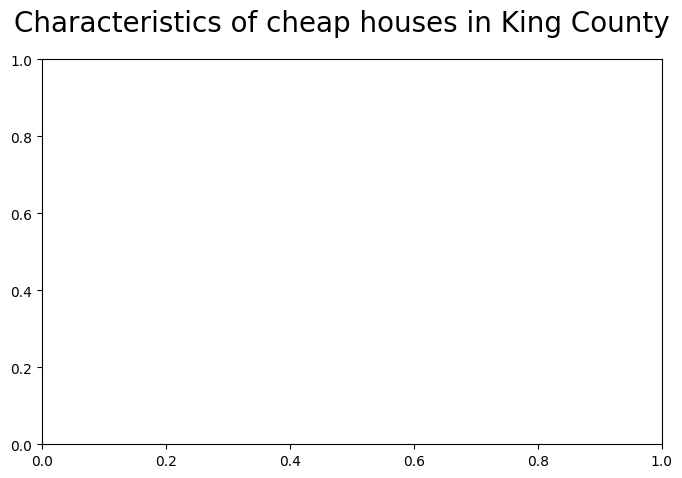

In [204]:
# plot features of cheap houses
fig, ax = plt.subplots() # create subplots on 2 rows and 3 columns
plt.suptitle('Characteristics of cheap houses in King County', fontsize=20)

ax.scatter()


## Overview of all sold objects in King County per region

## More info about the poorer areas

As my client wants to invest in poorer areas, I want to find out which areas are poor that means: low income, cheap houses, bad condition, low grades. Therefore I group the data by zip code and analyse the means. Additionally I include Data on King County income per zip code from Government Census.

In [205]:
# how many unique postcodes are there?
housing_df2['zipcode'].nunique()

70

In [206]:
# further insights on the areas
grouped_by_zipcode = housing_df2.groupby('zipcode').count().reset_index()

# areas with most sold houses
areas_with_most_sold_houses = grouped_by_zipcode.sort_values('id', ascending = False).reset_index()
top10_areas_with_most_sold_houses = areas_with_most_sold_houses.loc[0:9,['zipcode','id']]


# areas with least sold houses
areas_with_least_sold_houses = grouped_by_zipcode.sort_values('id').reset_index()
last10_areas_with_least_sold_houses = areas_with_least_sold_houses.loc[0:9,['zipcode','id']]
last10_areas_with_least_sold_houses

top10_areas_with_most_sold_houses

,zipcode,id
0,98103,602
1,98038,589
2,98115,583
3,98052,574
4,98117,553
5,98042,547
6,98034,545
7,98118,507
8,98023,499
9,98006,498


In [207]:
grouped_by_zipcode2 = housing_df2.groupby('zipcode').mean().reset_index()

TypeError: 'Categorical' with dtype category does not support reduction 'mean'

In [ ]:
# import data on mean income vs zip code
income_per_zipcode_df = pd.read_csv('data/King County Income by zip code - Sheet1-4.csv')
income_per_zipcode_df.drop(columns = income_per_zipcode_df.iloc[:,0:3], axis = 1, inplace = True)
income_per_zipcode_df.rename(columns={'mean income': 'mean_income', 'ZIP': 'zip'}, inplace = True)
income_per_zipcode_df['zip'] = income_per_zipcode_df.zip.str.strip('ZIP Code')
income_per_zipcode_df['mean_income'] = income_per_zipcode_df.mean_income.str.strip('$')
income_per_zipcode_df['mean_income'] = income_per_zipcode_df.mean_income.str.replace(',', '')
income_per_zipcode_df.dropna(inplace=True)

# convert data types
income_per_zipcode_df['zip'] = income_per_zipcode_df.zip.astype('int64')
income_per_zipcode_df['mean_income'] = income_per_zipcode_df.mean_income.astype('int64')
income_per_zipcode_df

,zip,mean_income
0,98002,51430
1,98168,57610
2,98047,59000
3,98003,59070
4,98032,59980
...,...,...
73,98112,332830
74,98033,353420
75,98040,408220
76,98004,411220


In [ ]:
# merge income dataframe with main dataframe

grouped_by_zipcode3 = grouped_by_zipcode2.set_index('zipcode').join(income_per_zipcode_df.set_index('zip'))

areas_with_lowest_grade = grouped_by_zipcode3.sort_values('mean_income').reset_index()
areas_with_lowest_grade.loc[0:20, ['zipcode', 'predicted_price', 'sqft_living','floors', 'condition', 'grade', 'neighbourhood_living_space', 'mean_income']]

          

,zipcode,predicted_price,sqft_living,floors,condition,grade,neighbourhood_living_space,mean_income
0,98002,234284.035,1627.744,1.286,3.744,6.693,1479.030,51430
1,98168,240328.372,1468.625,1.086,3.245,6.509,1471.680,57610
2,98003,294111.279,1928.882,1.296,3.371,7.543,1876.196,59070
3,98032,251296.240,1738.048,1.160,3.632,7.144,1668.632,59980
4,98188,289078.346,1802.772,1.184,3.331,7.037,1636.279,60230
5,98030,296187.980,1962.500,1.480,3.289,7.414,1919.422,61360
6,98148,284908.596,1610.526,1.193,3.070,6.947,1611.228,65850
7,98031,300340.403,1929.692,1.429,3.502,7.377,1908.853,68490
8,98198,302896.739,1745.361,1.186,3.443,7.104,1711.571,70720
9,98055,304262.108,1784.672,1.343,3.325,7.131,1785.728,72400
